# **Data Science Project**
---
**Topic of Dataset:** Adani Ports Market Share Data (27/11/2007 - 30/04/2021)

---
Meet Bhavsar -> IU2141230016    

---
**Steps**
---
1. Uploading the Dataset
2. Cleaning and preprocessing
3. Performing Descriptive statistics
4. Graph for visual representation
5. Using an existing Machine Learning model
6. Plotting a graph for the above applied model
7. Future Prediction using the ML model

---

In [ ]:
#importing the dataset and checking if its properly working
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Study material/SEM-6/Practical Files/DSC DataSets/ADANIPORTS.csv")
print(df.head)

In [ ]:
#cleaning and preprocessing of dataset
field_name_1 = 'Low'
field_name_2 = 'High'
field_name_3 = 'VWAP'

df = df.dropna(subset=[field_name_1])
df = df.dropna(subset=[field_name_2])
df = df.dropna(subset=[field_name_3])

print("Dataset cleaned by removing any Null values in respective fields.")

Dataset cleaned by removing any Null values in respective fields.


In [ ]:
#descriptive analysis (mean, median, mode, standard-deviation, variance)
import statistics
print("======== For LOW Field ========")
print("Mean : %.3f"% statistics.mean(df['Low']))
print("Median : %.3f"% statistics.median(df['Low']))
print("Mode : %.3f"% statistics.mode(df['Low']))
print("Standard Deviation : %.3f"% statistics.stdev(df['Low']))
print("Variance : %.3f"% statistics.variance(df['Low']))

print("\n======== For HIGH Field ========")
print("Mean : %.3f"% statistics.mean(df['High']))
print("Median : %.3f"% statistics.median(df['High']))
print("Mode : %.3f"% statistics.mode(df['High']))
print("Standard Deviation : %.3f"% statistics.stdev(df['High']))
print("Variance : %.3f"% statistics.variance(df['High']))

print("\n======== For VWAP Field ========")
print("Mean : %.3f"% statistics.mean(df['VWAP']))
print("Median : %.3f"% statistics.median(df['VWAP']))
print("Mode : %.3f"% statistics.mode(df['VWAP']))
print("Standard Deviation : %.3f"% statistics.stdev(df['VWAP']))
print("Variance : %.3f"% statistics.variance(df['VWAP']))

======== For LOW Field ========
Mean : 337.532
Median : 319.850
Mode : 144.000
Standard Deviation : 188.677
Variance : 35598.865

======== For HIGH Field ========
Mean : 351.608
Median : 331.275
Mode : 152.500
Standard Deviation : 198.618
Variance : 39449.034

======== For VWAP Field ========
Mean : 344.853
Median : 325.765
Mode : 153.170
Standard Deviation : 193.841
Variance : 37574.452


In [ ]:
#descriptive analysis (skewness, kurtosis)
def skewvalue(sk):
  if sk < -1:
    return("Negatively Skewness")
  elif sk >= -1 and sk <= 1:
    return("Zero Skewness")
  else:
    return("Positive Skewness")

def kurtvalue(kt):
  if kt < 3:
    return("Platy-Kurtic")
  elif kt > 3:
    return("Lepto-Kurtic")
  else:
    return("Meso-Kurtic")

from scipy.stats import skew, kurtosis

skew_low=skew(df['Low'])
skew_high=skew(df['High'])
skew_vwap=skew(df['VWAP'])
kurt_low=kurtosis(df['Low'])
kurt_high=kurtosis(df['High'])
kurt_vwap=kurtosis(df['VWAP'])

print("======== For LOW Field ========")
print("Skewness : %.3f"% skew_low, " -> ", skewvalue(skew_low))
print("Kurtosis : %.3f"% kurt_low, " -> ", kurtvalue(kurt_low))

print("\n======== For HIGH Field ========")
print("Skewness : %.3f"% skew_high, " -> ",  skewvalue(skew_high))
print("Kurtosis : %.3f"% kurt_high, " -> ", kurtvalue(kurt_high))

print("\n======== For VWAP Field ========")
print("Skewness : %.3f"% skew_vwap, " -> ", skewvalue(skew_vwap))
print("Kurtosis : %.3f"% kurt_vwap, " -> ", kurtvalue(kurt_vwap))

======== For LOW Field ========
Skewness : 1.255  ->  Positive Skewness
Kurtosis : 2.051  ->  Platy-Kurtic

======== For HIGH Field ========
Skewness : 1.309  ->  Positive Skewness
Kurtosis : 2.234  ->  Platy-Kurtic

======== For VWAP Field ========
Skewness : 1.280  ->  Positive Skewness
Kurtosis : 2.128  ->  Platy-Kurtic


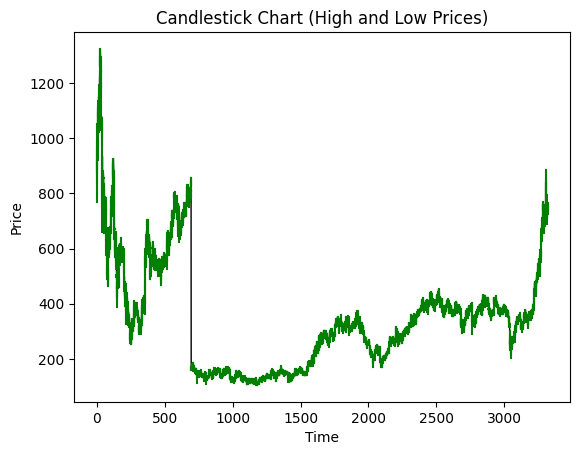

In [ ]:
#Adani Ports and Special Economic Zone had last split the face value of its shares from Rs 10 to Rs 2 in 2010.
#The share has been quoting on an ex-split basis from September 23, 2010.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(len(df['High'])), df['High'], color='black', linewidth=1)

for i in range(len(df['High'])):
    if df['High'][i] > df['Low'][i]:
        ax.plot([i, i], [df['Low'][i], df['High'][i]], color='green')
        ax.plot([i - 0.2, i + 0.2], [df['Open'][i], df['Open'][i]], color='green')
        ax.plot([i - 0.2, i + 0.2], [df['Close'][i], df['Close'][i]], color='green')
    else:
        ax.plot([i, i], [df['Low'][i], df['High'][i]], color='red')
        ax.plot([i - 0.2, i + 0.2], [df['Open'][i], df['Open'][i]], color='red')
        ax.plot([i - 0.2, i + 0.2], [df['Close'][i], df['Close'][i]], color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart (High and Low Prices)')
plt.show()

In [ ]:
#model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Low']]
y = df['High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: %.3f"% mse)
print("R-squared Score: %.3f"% r2)


Mean Squared Error: 203.594
R-squared Score: 0.995


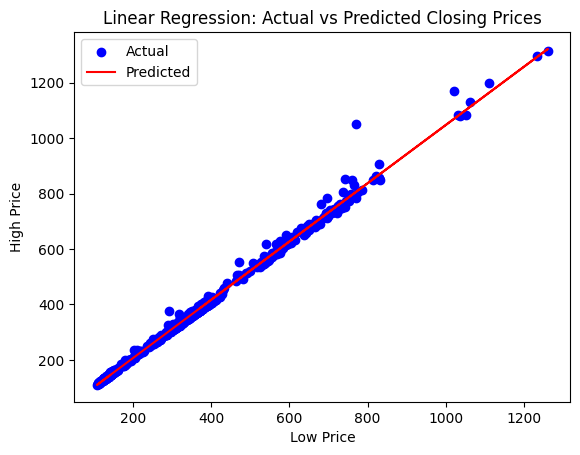

In [ ]:
#model graph
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.plot(X_test, y_pred, color='red', label='Predicted')

plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.title('Linear Regression: Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

In [ ]:
#future prediction
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['High']]
y = df['Low']

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
constant = model.intercept_
high=758.65
low = m * high + constant
print("Low value : %.3f"% low)
# 03 May 2021	 764.00	713.75	(High Low)
# 04 May 2021  782.00	760.05	(High Low)
# 05 May 2021  774.80	732.70	(High Low)
# 14 May 2021  758.65	727.50	(High Low)  - closest

Low value : 723.424
